In [30]:
import pandas as pd

file_path_1 = '/Users/sanket/Downloads/purchase_behaviour.csv'
file_path_2 = '/Users/sanket/Downloads/transaction_data.csv'

data_1 = pd.read_csv(file_path_1)
data_2 = pd.read_csv(file_path_2)

data_1.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [31]:
data_2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [19]:
missing_data_1 = data_1.isnull().sum()
missing_data_2 = data_2.isnull().sum()

missing_data_1, missing_data_2


(LYLTY_CARD_NBR      0
 LIFESTAGE           0
 PREMIUM_CUSTOMER    0
 dtype: int64,
 DATE              0
 STORE_NBR         0
 LYLTY_CARD_NBR    0
 TXN_ID            0
 PROD_NBR          0
 PROD_NAME         0
 PROD_QTY          0
 TOT_SALES         0
 dtype: int64)

In [20]:
# Check for duplicate rows in both datasets
duplicates_1 = data_1.duplicated().sum()
duplicates_2 = data_2.duplicated().sum()

duplicates_1, duplicates_2


(0, 1)

In [21]:
# Remove duplicate rows from the transaction data
data_2_cleaned = data_2.drop_duplicates()

data_2_cleaned.shape


(264835, 8)

In [22]:
# Merge the two datasets on the LYLTY_CARD_NBR column
merged_data = pd.merge(data_2_cleaned, data_1, on='LYLTY_CARD_NBR', how='left')

merged_data.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [23]:
# Group by product name and sum the total sales to identify the most profitable products
top_products = merged_data.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Sort the products by total sales in descending order and get the top 3
top_3_products = top_products.sort_values(by='TOT_SALES', ascending=False).head(3)

top_3_products


,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


In [24]:
# Group by customer (LYLTY_CARD_NBR) to calculate the total sales and number of transactions
loyal_customers = merged_data.groupby('LYLTY_CARD_NBR').agg(
    total_sales=('TOT_SALES', 'sum'),
    num_transactions=('TXN_ID', 'nunique')
).reset_index()

# Sort by total sales and number of transactions to identify loyal customers
loyal_customers_sorted = loyal_customers.sort_values(by=['total_sales', 'num_transactions'], ascending=False)

loyal_customers_sorted.head(5)


,LYLTY_CARD_NBR,total_sales,num_transactions
59694,226000,1300.0,2
60925,230078,138.6,17
17292,63197,132.8,15
69017,259009,127.2,13
42813,162039,126.8,18


In [25]:
# Merge the loyal customers with the original dataset to get customer characteristics
loyal_customers_details = pd.merge(loyal_customers_sorted, data_1[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']], on='LYLTY_CARD_NBR', how='left')

# Display the details of the most loyal customers
loyal_customers_details.head(5)


,LYLTY_CARD_NBR,total_sales,num_transactions,LIFESTAGE,PREMIUM_CUSTOMER
0,226000,1300.0,2,OLDER FAMILIES,Premium
1,230078,138.6,17,OLDER FAMILIES,Budget
2,63197,132.8,15,OLDER FAMILIES,Budget
3,259009,127.2,13,OLDER SINGLES/COUPLES,Mainstream
4,162039,126.8,18,OLDER FAMILIES,Mainstream


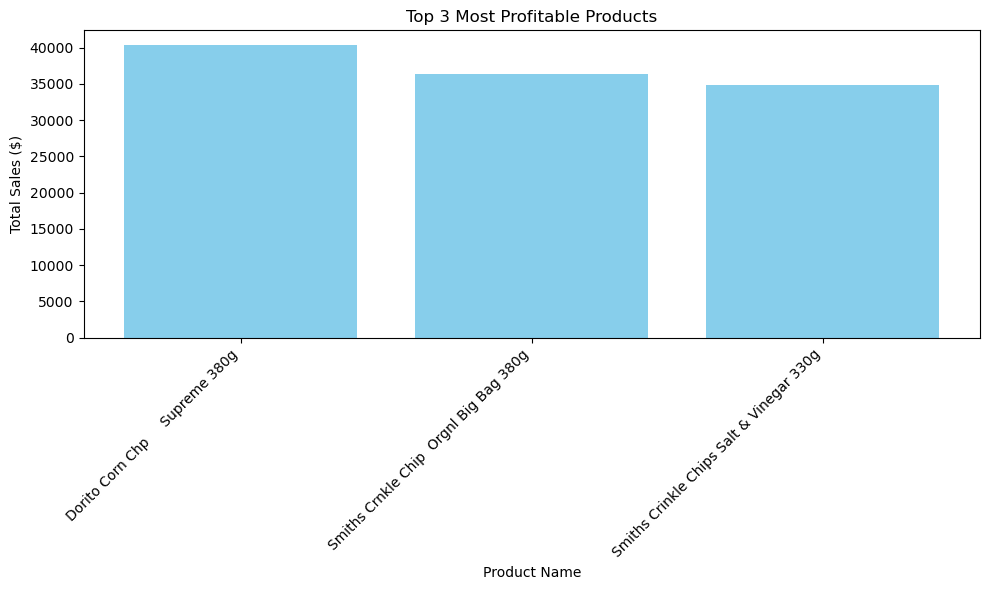

In [29]:
import matplotlib.pyplot as plt

#Bar plot for Top 3 Most Profitable Products
plt.figure(figsize=(10, 6))
plt.bar(top_3_products['PROD_NAME'], top_3_products['TOT_SALES'], color='skyblue')
plt.title('Top 3 Most Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



plt.show()


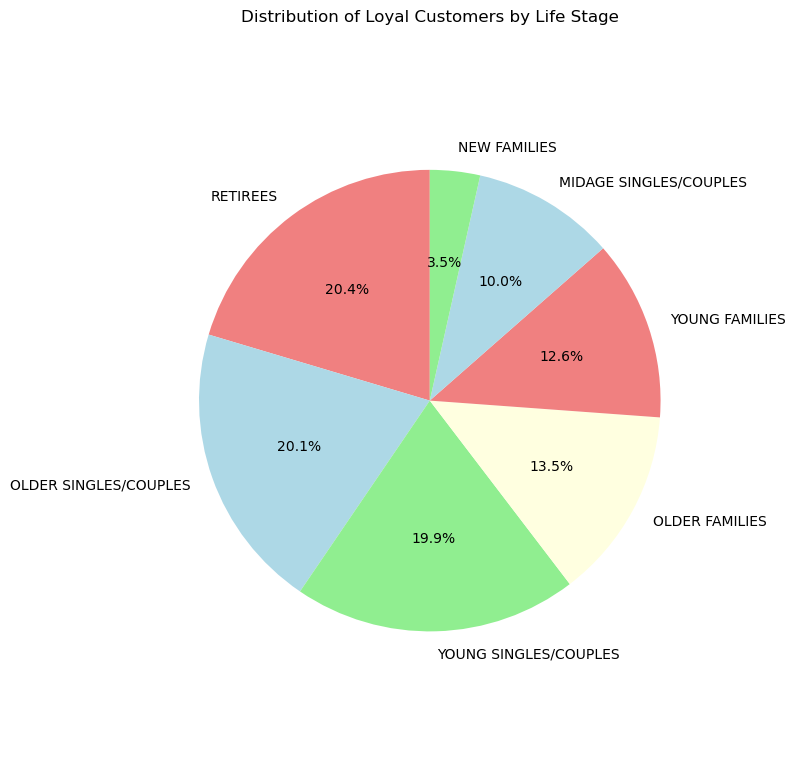

In [27]:
#  Pie chart for LIFESTAGE distribution of loyal customers
lifestage_counts = loyal_customers_details['LIFESTAGE'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(lifestage_counts, labels=lifestage_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow'])
plt.title('Distribution of Loyal Customers by Life Stage')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()

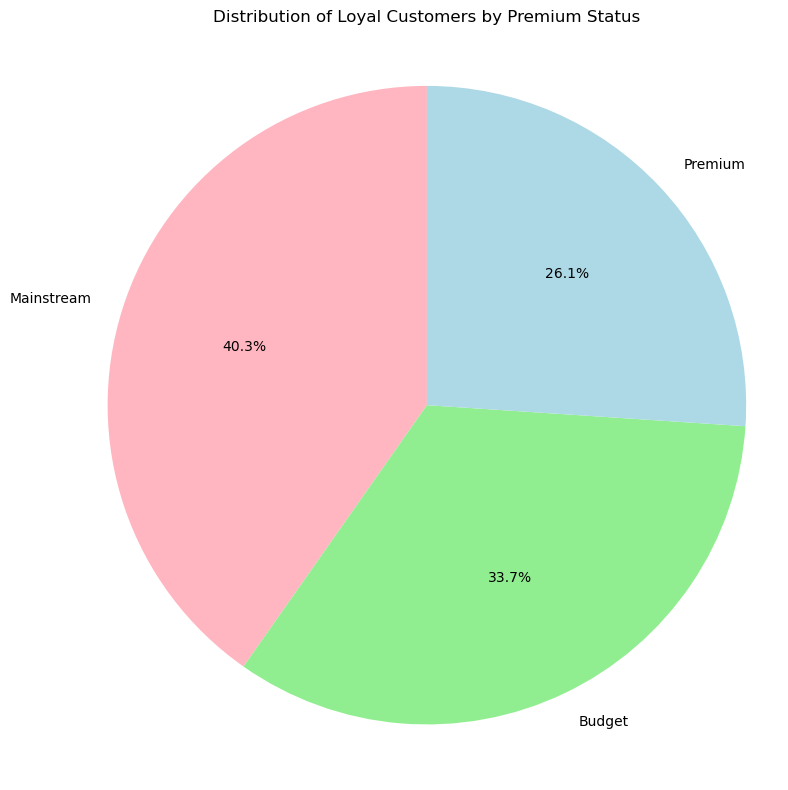

In [28]:


#Pie chart for PREMIUM_CUSTOMER distribution of loyal customers
premium_counts = loyal_customers_details['PREMIUM_CUSTOMER'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(premium_counts, labels=premium_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightpink', 'lightgreen', 'lightblue'])
plt.title('Distribution of Loyal Customers by Premium Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()